In [5]:
import json
import numpy as np

with open('Cavity_decay_dataset.json', "r") as f:
    cavitydata = json.load(f)

with open('Vacuum_decay_dataset.json', "r") as f:
    vacuumdata = json.load(f)

print(len(cavitydata))

125585


Vacuum: lambda = 2.2529994253292824, mean = 2.2529994253292824, variance = 5.0760064105340765, Fisher information = 0.19700526735441692
Cavity: lambda = 3.2159392788093473, mean = 3.2159392788093473, variance = 10.342265444988785, Fisher information = 0.09669061438415676


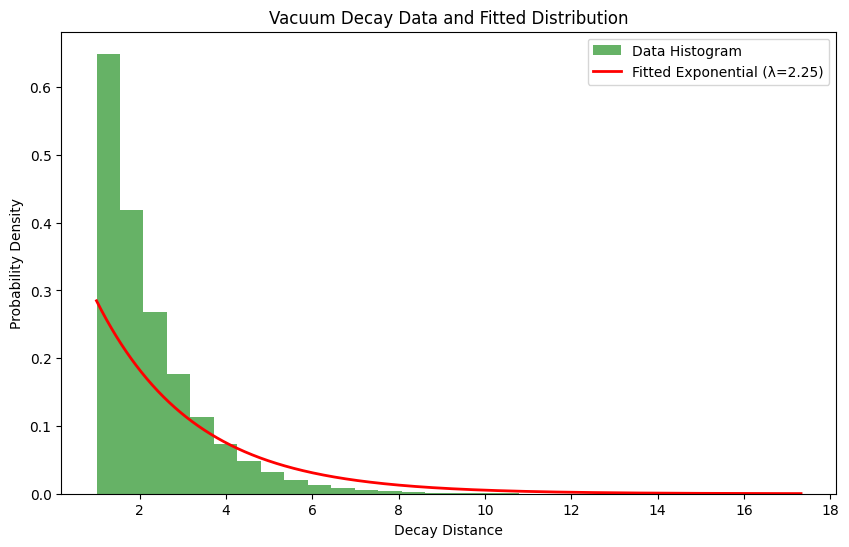

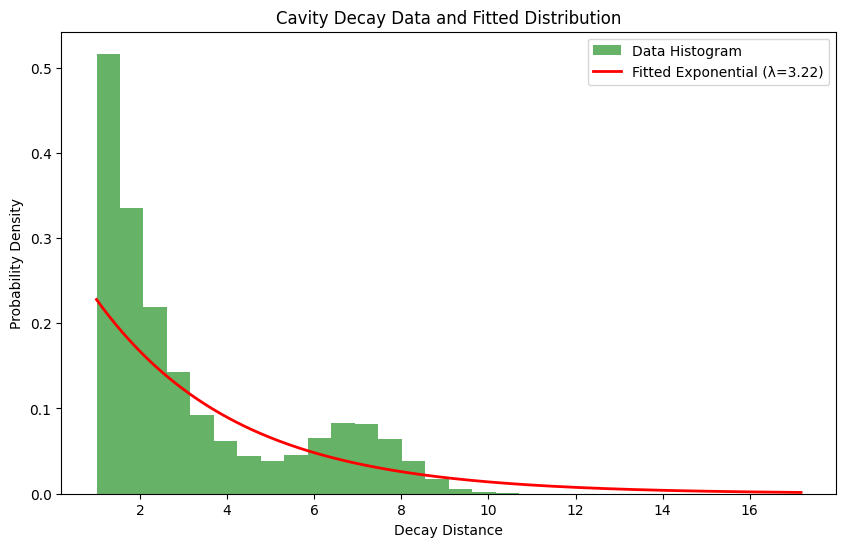

In [ ]:
from scipy.optimize import minimize
from scipy.stats import expon
import matplotlib.pyplot as plt


# Assuming cavitydata and vacuumdata are already loaded as numpy arrays

# Define the negative log-likelihood function for the exponential distribution
def neg_log_likelihood(lambda_, data):
    return -np.sum(expon.logpdf(data, scale=lambda_))

# Initial guess for lambda
initial_lambda = 1.0

# Perform MLE for vacuum data
result_vacuum = minimize(neg_log_likelihood, initial_lambda, args=(vacuumdata,), bounds=[(1e-10, None)])
lambda_vacuum = result_vacuum.x[0]

# Perform MLE for cavity data
result_cavity = minimize(neg_log_likelihood, initial_lambda, args=(cavitydata,), bounds=[(1e-10, None)])
lambda_cavity = result_cavity.x[0]

# Calculate mean and variance for vacuum data
mean_vacuum = lambda_vacuum
variance_vacuum = lambda_vacuum**2

# Calculate mean and variance for cavity data
mean_cavity = lambda_cavity
variance_cavity = lambda_cavity**2

# Calculate Fisher information for vacuum data
fisher_vacuum = 1 / lambda_vacuum**2

# Calculate Fisher information for cavity data
fisher_cavity = 1 / lambda_cavity**2

# Print results
print(f"Vacuum: lambda = {lambda_vacuum}, mean = {mean_vacuum}, variance = {variance_vacuum}, Fisher information = {fisher_vacuum}")
print(f"Cavity: lambda = {lambda_cavity}, mean = {mean_cavity}, variance = {variance_cavity}, Fisher information = {fisher_cavity}")


# Plot histograms and fitted distributions
def plot_distribution(data, lambda_, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
    
    # Generate fitted exponential distribution
    x = np.linspace(min(data), max(data), 1000)
    pdf = expon.pdf(x, scale=lambda_)
    plt.plot(x, pdf, 'r-', lw=2, label=f'Fitted Exponential (λ={lambda_:.2f})')
    
    plt.title(title)
    plt.xlabel('Decay Distance')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

# Plot for vacuum data
plot_distribution(vacuumdata, lambda_vacuum, 'Vacuum Decay Data and Fitted Distribution')

# Plot for cavity data
plot_distribution(cavitydata, lambda_cavity, 'Cavity Decay Data and Fitted Distribution')

In [ ]:
#now I'll also try to fit a gaussian

# Plot histograms and fitted distributions
def plot_Gaussdistribution(data, lambda_, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
    
    # Generate fitted exponential distribution
    x = np.linspace(min(data), max(data), 1000)
    pdf = expon.pdf(x, scale=lambda_)
    plt.plot(x, pdf, 'r-', lw=2, label=f'Fitted Exponential (λ={lambda_:.2f})')
    
    plt.title(title)
    plt.xlabel('Decay Distance')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

# Plot for vacuum data
plot_distribution(vacuumdata, lambda_vacuum, 'Vacuum Decay Data and Fitted Distribution')

# Plot for cavity data
plot_distribution(cavitydata, lambda_cavity, 'Cavity Decay Data and Fitted Distribution')

In [ ]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt

def exp_func(x, A, lambda_):
    return A * np.exp(-lambda_ * x)

def exp_gauss_func(x, A, lambda_, B, mu, sigma):
    return A * np.exp(-lambda_ * x) + B * np.exp(-((x - mu)**2) / (2 * sigma**2))

def fit_model(model_func, xdata):
    hist, bin_edges = np.histogram(xdata, bins=30, density=True)
    x_bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    popt, pcov = opt.curve_fit(model_func, x_bin_centers, hist, maxfev=5000)
    return popt, np.sum((hist - model_func(x_bin_centers, *popt))**2)

def hypothesis_test(xdata):
    # Fit both models
    popt_null, rss_null = fit_model(exp_func, xdata)
    popt_alt, rss_alt = fit_model(exp_gauss_func, xdata)
    
    # Degrees of freedom
    df_null = len(xdata) - len(popt_null)
    df_alt = len(xdata) - len(popt_alt)
    
    # F-test
    f_stat = ((rss_null - rss_alt) / (df_null - df_alt)) / (rss_alt / df_alt)
    p_value = 1 - stats.f.cdf(f_stat, df_null - df_alt, df_alt)
    
    return f_stat, p_value, popt_null, popt_alt

f_stat, p_value, popt_null, popt_alt = hypothesis_test(cavitydata)

print(f"F-statistic: {f_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The Gaussian component is significant.")
else:
    print("Fail to reject the null hypothesis: No significant Gaussian contribution.")


F-statistic: 211687533.29354587, p-value: 1.1102230246251565e-16
Reject the null hypothesis: The Gaussian component is significant.
